In [1]:
import sys
sys.path.append("..")

from torch.utils.data import DataLoader
from enformer_pytorch import from_pretrained

from MPRA_predict.utils import *
from MPRA_predict.datasets import *

np.set_printoptions(linewidth=120)

# random padding

In [2]:
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    if not os.path.exists(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_0.npy'):
        set_seed(0)
        model = from_pretrained('../pretrained_models/enformer_weights', target_length=2)
        dataset = SeqLabelDataset(
            data_path='data/enformer_sequences_test_100.csv',
            data_type='seq',
            input_column='seq', 
            crop=True, 
            crop_method='center',
            cropped_length=cropped_length,
            padding=True, 
            padding_method='random',
            padded_length=196608,
            N_fill_value=0)
        
        test_data_loader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=1)
        pred = get_pred(model, test_data_loader)
        np.save(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_0.npy', pred)

100%|██████████| 25/25 [00:10<00:00,  2.45it/s]


In [4]:
pred_list = []
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_0.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
for i in range(len(pred_list)):
    print(pred_list[i].shape)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)

(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
(100, 2, 5313)
[[1.         0.91221899 0.86290068 0.64269967 0.4766792  0.37262587 0.34781596 0.29748836]
 [0.91221899 1.         0.94905032 0.76238966 0.58770172 0.46890053 0.44104337 0.36879372]
 [0.86290068 0.94905032 1.         0.87100979 0.71576047 0.5780817  0.53622112 0.43105165]
 [0.64269967 0.76238966 0.87100979 1.         0.91193554 0.76827984 0.71455993 0.5484734 ]
 [0.4766792  0.58770172 0.71576047 0.91193554 1.         0.90024467 0.83728102 0.63008995]
 [0.37262587 0.46890053 0.5780817  0.76827984 0.90024467 1.         0.96140066 0.70302586]
 [0.34781596 0.44104337 0.53622112 0.71455993 0.83728102 0.96140066 1.         0.72923541]
 [0.29748836 0.36879372 0.43105165 0.5484734  0.63008995 0.70302586 0.72923541 1.        ]]


# different seed

In [2]:
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred_list = []
    for seed in range(10):
        set_seed(seed)
        model = from_pretrained('../pretrained_models/enformer_weights', target_length=2)
        dataset = SeqLabelDataset(
            data_path='data/enformer_sequences_test_100.csv',
            data_type='seq',
            input_column='seq', 
            crop=True, 
            crop_method='center',
            cropped_length=cropped_length,
            padding=True, 
            padding_method='random',
            padded_length=196608,
            N_fill_value=0)
        
        test_data_loader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=1)
        pred = get_pred(model, test_data_loader)
        pred_list.append(pred)
    pred_list = np.stack(pred_list)
    np.save(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_10_times.npy', pred_list)

100%|██████████| 25/25 [00:10<00:00,  2.45it/s]


In [6]:
pred_list = []
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_10_times.npy')
    pred_list.append(pred)
pred_list = np.stack(pred_list)
print(pred_list.shape)

pred_average = np.mean(pred_list, axis=0)
pred_list = np.concatenate([pred_list, pred_average[None, :]], axis=0)

target = np.load('data/enformer_targets_test_100.npy')
# pred_list = np.concatenate([pred_list, target[None, :]], axis=0)
# print(pred_list.shape)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)

(6, 10, 100, 2, 5313)
[[1.         0.91650956 0.8462999  0.66807756 0.41723223 0.34157036 0.79351586]
 [0.91650956 1.         0.95267346 0.80298404 0.54084446 0.45242502 0.88340432]
 [0.8462999  0.95267346 1.         0.91211744 0.67078457 0.57301032 0.93999257]
 [0.66807756 0.80298404 0.91211744 1.         0.84375793 0.7428168  0.9481501 ]
 [0.41723223 0.54084446 0.67078457 0.84375793 1.         0.94984662 0.85888708]
 [0.34157036 0.45242502 0.57301032 0.7428168  0.94984662 1.         0.79489295]
 [0.79351586 0.88340432 0.93999257 0.9481501  0.85888708 0.79489295 1.        ]]


In [7]:
corr = np.corrcoef()
print(corr)

[[1.         0.95191064 0.95588464 0.94537215 0.9447647  0.94509406 0.95063859 0.94949662 0.94531185 0.95481561]
 [0.95191064 1.         0.95712379 0.95406853 0.95336002 0.94795862 0.95178521 0.94530407 0.95498813 0.94671995]
 [0.95588464 0.95712379 1.         0.95426568 0.95670812 0.95377861 0.96508805 0.95562982 0.95468581 0.95325365]
 [0.94537215 0.95406853 0.95426568 1.         0.95168601 0.94232363 0.9508892  0.95030076 0.94697205 0.95142662]
 [0.9447647  0.95336002 0.95670812 0.95168601 1.         0.94756267 0.9531752  0.94729781 0.95080258 0.94599747]
 [0.94509406 0.94795862 0.95377861 0.94232363 0.94756267 1.         0.94406115 0.93872936 0.94071609 0.9361314 ]
 [0.95063859 0.95178521 0.96508805 0.9508892  0.9531752  0.94406115 1.         0.94782021 0.94740625 0.95065241]
 [0.94949662 0.94530407 0.95562982 0.95030076 0.94729781 0.93872936 0.94782021 1.         0.94053483 0.94470579]
 [0.94531185 0.95498813 0.95468581 0.94697205 0.95080258 0.94071609 0.94740625 0.94053483 1.    

(11, 1062600)


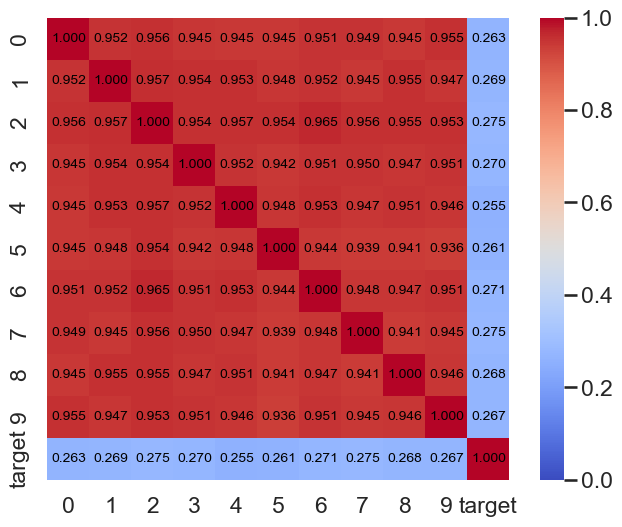

In [17]:
ticklabels = list(range(10)) + ['target']

target = np.load('data/enformer_targets_test_100.npy')

data = np.concatenate([pred_list[0], target[None, :]])
data = data.reshape(data.shape[0], -1)
print(data.shape)
corr = np.corrcoef(data)

plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(
    corr, 
    square = True,
    xticklabels=ticklabels, yticklabels=ticklabels,
    cmap="coolwarm", vmin=0, vmax=1, 
    annot=True, fmt=".3f", annot_kws={"size": 10, 'color': 'black'})
plt.savefig('figures/corr_heatmap_256_random.png', dpi=400)
plt.show()

In [3]:
pred_list = []
for random_seed in range(10):
    pred = np.load(f'data/Enformer_pred_crop_256_pad_196608_random_{random_seed}.npy')
    pred_list.append(pred)
pred_list = np.stack(pred_list)

pred_average = np.mean(pred_list, axis=0)
pred_list = np.concatenate([pred_list, pred_average[None, :]], axis=0)

target = np.load('data/enformer_targets_test_100.npy')
pred_list = np.concatenate([pred_list, target[None, :]], axis=0)
print(pred_list.shape)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Enformer_pred_crop_256_pad_196608_random_0.npy'